two_levels_isotropic_dielectric

In [1]:
from IPython.display import display, Math, Latex

k = var ('k')

a = var('a')
assume(a>0)

x = var('x')
y = var('y')
z = var('z')

c = var('c')
assume(c>0)
omega = var('omega')

rot E = mu * i * omega / c * H

rot H = - i * omega / c * epsilon_ab * E

Laplasian E + mu * epsilon_ab * omega^2 / c^2 * E - grad div E = 0

уравнение Даламбера

mu * epsilon_ab / c^2 * diff(E, t, 2) - Laplasian E = 0

Ищем решение в виде

E = E(x) * exp(I * k * z) * exp(-I * omega * t)

подставляя в уравнение Даламбера приходим к обыкновенному дифференциальному уравнению

diff (E(x), x, 2) + (mu * epsilon * omega^2 / c^2 - k^2) * E(x) = 0

для диэлектрика

kappa^2 = (mu * epsilon * omega^2 / c^2 - k^2)

diff (E(x), x, 2) + kappa^2 * E(x) = 0

In [2]:
n_layers = 2

kappa = []
for i in range(n_layers):
    exec ("kappa_" + str(i) + " = var ('kappa_" + str(i) + "') ")
    exec ("assume(kappa_" + str(i) + " > 0)")
    exec ("kappa += [kappa_" + str(i) + "]")

display(Math(latex(kappa)))

<IPython.core.display.Math object>

In [3]:
epsilon = []
for i in range(n_layers):
    exec ("epsilon_" + str(i) + " = var ('epsilon_" + str(i) + "') ")
    exec ("assume(epsilon_" + str(i) + " > 0)")
    exec ("epsilon += [epsilon_" + str(i) + "]")

display(Math(latex(epsilon)))

<IPython.core.display.Math object>

In [4]:
mu = []
for i in range(n_layers):
    exec ("mu_" + str(i) + " = var ('mu_" + str(i) + "') ")
    exec ("assume(mu_" + str(i) + " > 0)")
    exec ("mu += [mu_" + str(i) + "]")

display(Math(latex(mu)))

<IPython.core.display.Math object>

In [5]:
# исходя из вида дифференциальных уравнений для диэлектрика
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa = []
for i in range(n_layers):
    eq_kappa += [mu[i] * epsilon[i] * omega^2 / c^2 - k^2 == kappa[i]^2]

display(Math(latex(eq_kappa)))

<IPython.core.display.Math object>

In [6]:
# решаем полученные обыкновенные дифференциальные уравнения
E_x = function('E_x')(x)

de_dielectric_x = diff (E_x, x, 2) + kappa[i]^2 * E_x == 0
E_dielectric_x = desolve(de_dielectric_x, E_x, ivar = x)


# получая таким образом выражения для электрического поля в диэлектрике
display(Math(latex(E_dielectric_x)))
# _K2*cos(kappa*x) + _K1*sin(kappa*x)

<IPython.core.display.Math object>

In [7]:
Ax = []
Az = []
Bx = []
Bz = []
for i in range(n_layers):
    exec ("Ax_" + str(i) + " = var ('Ax_" + str(i) + "') ")
    exec ("Az_" + str(i) + " = var ('Az_" + str(i) + "') ")
    exec ("Bx_" + str(i) + " = var ('Bx_" + str(i) + "') ")
    exec ("Bz_" + str(i) + " = var ('Bz_" + str(i) + "') ")
    exec ("Ax += [Ax_" + str(i) + "]")
    exec ("Bx += [Bx_" + str(i) + "]")
    exec ("Az += [Az_" + str(i) + "]")
    exec ("Bz += [Bz_" + str(i) + "]")

display(Math(latex(Ax)))
display(Math(latex(Az)))
display(Math(latex(Bx)))
display(Math(latex(Bz)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
Ex = []
Ez = []
for i in range(n_layers):
    Ex += [ lambda x, i=i : Ax[i] * cos(kappa[i] * x) + Bx[i] * sin(kappa[i] * x)]
    Ez += [ lambda x, i=i : Az[i] * cos(kappa[i] * x) + Bz[i] * sin(kappa[i] * x)]

for i in range(n_layers):
    display(Math(latex(Ex[i](x))))
    display(Math(latex(Ez[i](x))))
    print("")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
rot_E_y = []
rotE_y = []
Hy = []
for i in range(n_layers):
    rot_E_y += [lambda x, i=i : (I * k * Ex[i](x) - diff(Ez[i](x), x))]
    exec ("rotE_y += [lambda x, i=i :"+ str(rot_E_y[i](x)) + "]")
    Hy      += [lambda x, i=i : c / (mu[i] * I * omega) * rotE_y[i](x)]

    display(Math(latex(rot_E_y[i](x))))
    display(Math(latex(rotE_y[i](x))))
    print("")
    display(Math(latex(Hy[i](x))))
    print("")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
rot_H_x = []
rot_H_z = []
for i in range(n_layers):
    rot_H_x += [lambda x, i=i : -I * k * Hy[i](x)]
    rot_H_z += [lambda x, i=i : diff(Hy[i](x), x)]

    display(Math(latex(rot_H_x[i](x))))
    display(Math(latex(rot_H_z[i](x))))
    print("")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
# rot H = (1/c) * dD/dt
eq_rot_H_x = []
eq_rot_H_z = []
for i in range(n_layers):
    eq_rot_H_x += [rot_H_x[i](x) == (1/c) *(-I * omega) * epsilon[i] * Ex[i](x)]
    eq_rot_H_z += [rot_H_z[i](x) == (1/c) *(-I * omega) * epsilon[i] * Ez[i](x)]

    display(Math(latex(eq_rot_H_x[i])))
    print("")
    display(Math(latex(eq_rot_H_z[i])))
    print("")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
exclude_vars = [Az[0], Az[n_layers - 1]]
exclude_vars

[Az_0, Az_1]

In [13]:
# граничные условия
# тангенциальная компонента электрического поля
eq_Ez_superconductor_boundary_conditions = []
eq_Ez_superconductor_boundary_conditions += [Ez[0](0) == 0.0]
eq_Ez_superconductor_boundary_conditions += [Ez[n_layers - 1](a*n_layers) == 0.0]

display(Math(latex(Ez[0](x))))
display(Math(latex(Ez[0](0))))

display(Math(latex(eq_Ez_superconductor_boundary_conditions)))

boundary_subs_begin = solve(eq_Ez_superconductor_boundary_conditions[0], Az[0])[0]
boundary_subs_end = solve(eq_Ez_superconductor_boundary_conditions[n_layers - 1], Az[n_layers - 1])[0]

display(Math(latex(boundary_subs_begin)))
display(Math(latex(boundary_subs_end)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
# граничные условия на гринице диэлектрика и диэлектрика
# тангенциальная компонента электрического поля
eq_Ez_boundary_conditions = []
for i in range(n_layers - 1):
    eq_Ez_boundary_conditions += [Ez[i] (a*(i+1)) == Ez[i+1](a*(i+1))]

    display(Math(latex(eq_Ez_boundary_conditions[i])))
    print("")

<IPython.core.display.Math object>

In [15]:
# граничные условия на гринице диэлектрика и диэлектрика
# нормальная компонента электрического смещения
eq_Ex_boundary_conditions = []
for i in range(n_layers - 1):
    eq_Ex_boundary_conditions += [epsilon[i] * Ex[i](a*(i+1)) == epsilon[i+1] * Ex[i+1](a*(i+1))]

    display(Math(latex(eq_Ex_boundary_conditions[i])))
    print("")

<IPython.core.display.Math object>

In [16]:
# граничные условия на гринице диэлектрика и диэлектрика
# тангенциальная компонента поля H
eq_Hy_boundary_conditions = []
for i in range(n_layers - 1):
    eq_Hy_boundary_conditions += [Hy[i] (a*(i+1)) == Hy[i+1](a*(i+1))]

    display(Math(latex(eq_Hy_boundary_conditions[i])))
    print("")

<IPython.core.display.Math object>

In [17]:
def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

def GenerateMatrixMult(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) * v for v in vars] for equ in equsys])
    return A

def reduceDependedRows(M):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())

    M_pivot_rows = M.pivot_rows()
    print ("M.pivot_rows() =", M_pivot_rows)

    M_rows = M.rows()
    for row in M_rows:
        print("row =")
        display(Math(latex(row)))

    reduced_list = []
    for r in M_pivot_rows:
        print ("M_rows[", r, "] =")
        display(Math(latex(M_rows[r])))
        reduced_list.append(M_rows[r])

    reduced_M = matrix(SR, len(M_pivot_rows), M.ncols(), reduced_list)
    if reduced_M.nrows() == reduced_M.ncols():
        reduced_M_det = reduced_M.det()
        print ("")
        print ("reduced_M.det() =")
        display(Math(latex(reduced_M_det)))
    return reduced_M

In [18]:
def rot_H_solve(M_rotH, vars, eq_kappa, kappa):
    if (M_rotH.nrows() != 2):
        return
    if (M_rotH.ncols() != len(vars)):
        return
    xx = vector(SR, vars)
    yy = vector(SR, [0, 0])
    print("eqns =")
    eqns = [(M_rotH*xx)[index] == yy[index] for index in [0,1]]
    display(Math(latex(eqns)))
    res = []

    for index in [0,1]:
        row_M = M_rotH[index]
        print("row_M =")
        display(Math(latex(row_M)))
        eq = eqns[index].full_simplify()
        print ("eq =")
        display(Math(latex(eq)))
        print ("")
        
        eq2 = (eq / cos(kappa * x)).full_simplify().expand()
        print ("eq2 =")
        display(Math(latex(eq2)))
        
        tg_kappa_x_coeff = eq2.lhs().coefficient(sin(kappa * x) / cos(kappa * x))
        print ("tg_kappa_x_coeff =")
        display(Math(latex(tg_kappa_x_coeff)))
        
        eq_tg_kappa_x_coeff = tg_kappa_x_coeff == 0
        for var in vars:
            print ("var =")
            display(Math(latex(var)))
            sol_tg_kappa_x_coeff = solve(eq_tg_kappa_x_coeff, var)
            print("sol_tg_kappa_x_coeff=")
            display(Math(latex(sol_tg_kappa_x_coeff)))
            if len(sol_tg_kappa_x_coeff) > 0:
                res += sol_tg_kappa_x_coeff            
            
                eq4 = eq.subs(sol_tg_kappa_x_coeff)
                print ("eq4 =")
                display(Math(latex(eq4)))

                eq4 = eq4.full_simplify()
                print ("eq4 =")
                display(Math(latex(eq4)))

                for var in vars:
                    print ("var =")
                    display(Math(latex(var)))
                    print ("")
                    sol = solve(eq4, var)
                    print("sol=")
                    display(Math(latex(sol)))
                    print ("")
                    res += sol
        
        #for var in vars:
        #    print ("var =")
        #    display(Math(latex(var)))
        #    print ("")
        #    sol = solve(eq, var)
        #    print("sol=")
        #    display(Math(latex(sol[0].full_simplify())))
        #    print ("")
        #    zero_vars = []
        #    for v in vars:
        #        if v != var:
        #            print ("v = ")
        #            display(Math(latex(v)))
        #            c_v = sol[0].rhs().coefficient(v)
        #            # print ("sol[0].rhs().coefficient(v) = ")
        #            display(Math(latex(c_v)))
        #            # print ("c_v.variables() =", c_v.variables())
        #            for c_v_var in c_v.variables():
        #                if "x" == str(c_v_var):
        #                    zero_vars.append(v == 0)
        #    if len(vars) - len(zero_vars) > 1:
        #        result_rhs = sol[0].rhs().subs(zero_vars)
        #        result = var == result_rhs
        #        print ("result =")
        #        display(Math(latex(result)))
        #        if omega in result_rhs.arguments():
        #            sol_omega_2 = solve(eq_kappa, omega^2)
        #            display(Math(latex(sol_omega_2[0].rhs())))
        #            result_rhs = result_rhs.subs(omega^2 == sol_omega_2[0].rhs())
        #            result_rhs = result_rhs.full_simplify()
        #            result = var == result_rhs
        #        print ("result =")
        #        display(Math(latex(result)))
        #        res.append(result)
        #        res += zero_vars
        #print("")
    return res

In [19]:
res_rot_H = []
for i in range(n_layers):
    eqs_rotH = [(eq_rot_H_x[i]*(-I)*omega/c)
                     .subs(solve(eq_kappa[i], omega^2))
                     .subs(boundary_subs_begin).subs(boundary_subs_end)
                     .full_simplify(),
                (eq_rot_H_z[i]*(-I)*omega/c)
                     .subs(solve(eq_kappa[i], omega^2))
                     .subs(boundary_subs_begin).subs(boundary_subs_end)
                     .full_simplify(),
               ]

    print("eq_rot_H_x = ")
    display(Math(latex(eqs_rotH[0])))
    print("eq_rot_H_z = ")
    display(Math(latex(eqs_rotH[1])))
    print("")
    
    vars_dielectric = [Ax[i], Az[i], Bx[i], Bz[i]]
    
    vars_dielectric = [var for var in vars_dielectric if var not in exclude_vars]
    display(Math(latex(vars_dielectric)))
    M_rotH = GenerateMatrix(eqs_rotH, vars_dielectric)
    print ("M_rotH =")
    display(Math(latex(M_rotH)))
    print ("M_rotH.nrows =", M_rotH.nrows())
    print ("M_rotH.ncols =", M_rotH.ncols())
    print ("M_rotH.rank =", M_rotH.rank())
    res_rot_H += rot_H_solve(M_rotH, vars_dielectric, eq_kappa[i], kappa[i])

eq_rot_H_x = 


<IPython.core.display.Math object>

eq_rot_H_z = 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

M_rotH =


<IPython.core.display.Math object>

M_rotH.nrows = 2
M_rotH.ncols = 3
M_rotH.rank = 2
eqns =


<IPython.core.display.Math object>

row_M =


<IPython.core.display.Math object>

eq =


<IPython.core.display.Math object>


eq2 =


<IPython.core.display.Math object>

tg_kappa_x_coeff =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

row_M =


<IPython.core.display.Math object>

eq =


<IPython.core.display.Math object>


eq2 =


<IPython.core.display.Math object>

tg_kappa_x_coeff =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


eq_rot_H_x = 


<IPython.core.display.Math object>

eq_rot_H_z = 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

M_rotH =


<IPython.core.display.Math object>

M_rotH.nrows = 2
M_rotH.ncols = 3
M_rotH.rank = 2
eqns =


<IPython.core.display.Math object>

row_M =


<IPython.core.display.Math object>

eq =


<IPython.core.display.Math object>


eq2 =


<IPython.core.display.Math object>

tg_kappa_x_coeff =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


row_M =


<IPython.core.display.Math object>

eq =


<IPython.core.display.Math object>


eq2 =


<IPython.core.display.Math object>

tg_kappa_x_coeff =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>

sol_tg_kappa_x_coeff=


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

eq4 =


<IPython.core.display.Math object>

var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>


var =


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>

In [20]:
display(Math(latex(res_rot_H)))

<IPython.core.display.Math object>

In [21]:
vars = Ax + Az + Bx + Bz
vars

[Ax_0, Ax_1, Az_0, Az_1, Bx_0, Bx_1, Bz_0, Bz_1]

In [22]:
M_res_rot_H = GenerateMatrix(res_rot_H, vars)
display(Math(latex(M_res_rot_H)))

<IPython.core.display.Math object>

In [23]:
reduced_M_res_rot_H = reduceDependedRows(M_res_rot_H)


M.nrows() 19
M.ncols() 8
M.rank() 4
M.pivot_rows() = (0, 1, 7, 8)
row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

M_rows[ 0 ] =


<IPython.core.display.Math object>

M_rows[ 1 ] =


<IPython.core.display.Math object>

M_rows[ 7 ] =


<IPython.core.display.Math object>

M_rows[ 8 ] =


<IPython.core.display.Math object>

In [24]:
display(Math(latex(reduced_M_res_rot_H)))

<IPython.core.display.Math object>

In [25]:
def make_eqsys_from_reduced_M(M_rotH, vars):
    xx = vector(SR, vars)
    print("eqns =")
    eqns = [(M_rotH*xx)[index] == 0 for index in range(M_rotH.nrows())]
    display(Math(latex(eqns)))
    return (eqns)

In [26]:
eqsys_rotH_simplified = make_eqsys_from_reduced_M(reduced_M_res_rot_H, vars)

eqns =


<IPython.core.display.Math object>

In [27]:
eqsys_rotH = []

for i in range(n_layers):
    eqsys_rotH += [(eq_rot_H_x[i]*(-I)*omega/c).subs(solve(eq_kappa[i], omega^2)).full_simplify(),
                   (eq_rot_H_z[i]*(-I)*omega/c).subs(solve(eq_kappa[i], omega^2)).full_simplify(),
                  ]
    display(Math(latex(eqsys_rotH[2*i])))
    print("")
    display(Math(latex(eqsys_rotH[2*i + 1])))
    print("")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [28]:
        # + eq_Hy_boundary_conditions \
all_eqs = eq_Ez_boundary_conditions \
        + eq_Ex_boundary_conditions \
        + eqsys_rotH_simplified
display(Math(latex(all_eqs)))

<IPython.core.display.Math object>

all_eqs = [eq.subs(boundary_subs_begin).subs(boundary_subs_end).full_simplify() for eq in all_eqs]
all_eqs

In [29]:
all_eqs += eq_Ez_superconductor_boundary_conditions
display(Math(latex(all_eqs)))

<IPython.core.display.Math object>

In [30]:
len(all_eqs)

8

vars = [var for var in vars if var not in exclude_vars]
vars

In [31]:
M = GenerateMatrix(all_eqs, vars)
display(Math(latex(M)))

<IPython.core.display.Math object>

In [32]:
reduced_M = reduceDependedRows(M)


M.nrows() 8
M.ncols() 8
M.rank() 8
M.pivot_rows() = (0, 1, 2, 3, 4, 5, 6, 7)
row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

row =


<IPython.core.display.Math object>

M_rows[ 0 ] =


<IPython.core.display.Math object>

M_rows[ 1 ] =


<IPython.core.display.Math object>

M_rows[ 2 ] =


<IPython.core.display.Math object>

M_rows[ 3 ] =


<IPython.core.display.Math object>

M_rows[ 4 ] =


<IPython.core.display.Math object>

M_rows[ 5 ] =


<IPython.core.display.Math object>

M_rows[ 6 ] =


<IPython.core.display.Math object>

M_rows[ 7 ] =


<IPython.core.display.Math object>


reduced_M.det() =


<IPython.core.display.Math object>

In [33]:
reduced_M_det = reduced_M.det()
display(Math(latex(reduced_M_det)))

<IPython.core.display.Math object>

In [34]:
display(Math(latex(((reduced_M_det == 0)).full_simplify())))

<IPython.core.display.Math object>

In [35]:
display(Math(latex(((reduced_M_det == 0)*kappa_0*kappa_1/I/k).full_simplify())))

<IPython.core.display.Math object>

In [36]:
disp_eq_0 = (solve([reduced_M_det == 0], kappa_0)[0]/kappa_1).full_simplify()
disp_eq_0

kappa_0/kappa_1 == -epsilon_0*cos(a*kappa_0)*sin(a*kappa_1)/(epsilon_1*cos(a*kappa_1)*sin(a*kappa_0))

In [37]:
disp_eq_1 = (solve([reduced_M_det == 0], kappa_1)[0]/kappa_0).full_simplify()
disp_eq_1

kappa_1/kappa_0 == -epsilon_1*cos(a*kappa_1)*sin(a*kappa_0)/(epsilon_0*cos(a*kappa_0)*sin(a*kappa_1))

In [38]:
display(Math(latex(disp_eq_0)))

<IPython.core.display.Math object>

In [39]:
display(Math(latex(disp_eq_1)))

<IPython.core.display.Math object>

In [53]:
# исходя из вида дифференциальных уравнений для диэлектрика
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa_kappa = []
eq_kappa2_kappa2 = []

for i in range(n_layers - 1):
    # eq_kappa_s = eq_kappa.subs(solve(eq_s, k^2)).full_simplify()
    eq_kappa_kappa += [eq_kappa[i].subs(solve(eq_kappa[i+1], k^2)).full_simplify()]
    eq_kappa2_kappa2 += [(solve(eq_kappa_kappa[i], omega^2)[0]/c^2).full_simplify()]

# display(Math(latex(eq_kappa_kappa)))
display(Math(latex(eq_kappa2_kappa2)))

<IPython.core.display.Math object>

In [71]:
disp_eq = []
for i in range(n_layers - 1):
    disp_eq += [((reduced_M_det == 0)*kappa[i]*kappa[i+1]/I/k/cos(a*kappa[i])/cos(a*kappa[i+1])/epsilon[i]/epsilon[i+1]).full_simplify().expand()]
    display(Math(latex(disp_eq[i])))

<IPython.core.display.Math object>

In [74]:
eq_kappa = []
for i in range(n_layers-1):
    eq_kappa += [disp_eq[i].subs(solve(eq_kappa2_kappa2[i], kappa[i]))]
    eq_kappa += [disp_eq[i].subs(solve(eq_kappa2_kappa2[i], kappa[i+1]))]
    display(Math(latex(eq_kappa[2*i])))
    display(Math(latex(eq_kappa[2*i+1])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [75]:
# sgs
A = 0.1
digit_values = [omega == 2*pi.n()*10^11, c == 299792458 * 100]
for i in range(n_layers):
    digit_values += [mu[i] == 1]
    digit_values += [epsilon[i] == 2*(i+1)]
print (digit_values)

[omega == 6.28318530717959e11, c == 29979245800, mu_0 == 1, epsilon_0 == 2, mu_1 == 1, epsilon_1 == 4]


In [85]:
eq_kappa_d = []
for i in range(n_layers - 1):
    eq_kappa_d += [eq_kappa[2*i].subs(digit_values).subs(a == A)]
    print("eq_kappa_d =", eq_kappa_d[2*i])
    print("")
    eq_kappa_d += [eq_kappa[2*i + 1].subs(digit_values).subs(a == A)]
    print("eq_kappa_d =", eq_kappa_d[2*i + 1])

eq_kappa_d = 1/4*kappa_1*sin(0.100000000000000*kappa_1)/cos(0.100000000000000*kappa_1) + 1/59958491600*sqrt(898755178736817640000*kappa_1^2 - 7.89568352087149e23)*sin((3.33564095198152e-12)*sqrt(898755178736817640000*kappa_1^2 - 7.89568352087149e23))/cos((3.33564095198152e-12)*sqrt(898755178736817640000*kappa_1^2 - 7.89568352087149e23)) == 0

eq_kappa_d = 1/2*kappa_0*sin(0.100000000000000*kappa_0)/cos(0.100000000000000*kappa_0) + 1/119916983200*sqrt(898755178736817640000*kappa_0^2 + 7.89568352087149e23)*sin((3.33564095198152e-12)*sqrt(898755178736817640000*kappa_0^2 + 7.89568352087149e23))/cos((3.33564095198152e-12)*sqrt(898755178736817640000*kappa_0^2 + 7.89568352087149e23)) == 0


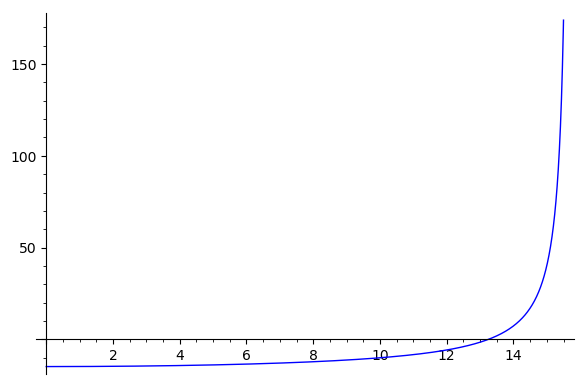

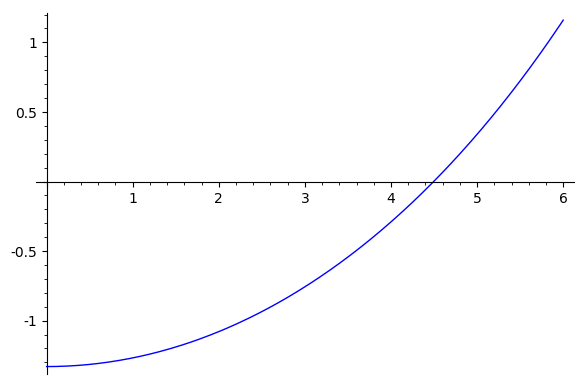

In [92]:
for i in range(n_layers - 1):
    plot(eq_kappa_d[2*i].lhs(), 0, 15.5).show()
    plot(eq_kappa_d[2*i+1].lhs(), 0, 6).show()

In [ ]:
for i in range(n_layers - 1):
    eq_kappa_f = lambda x : eq_kappa_d[2*i].lhs().subs(kappa[i+1] == x)
    print (eq_kappa_f(x))
    a = 13
    b = 14
    plot(eq_kappa_f(x), a, b).show()
    minval, s_1 = find_local_minimum(eq_kappa_f(x), a, b)
    maxval, s_2 = find_local_maximum(eq_kappa_f(x), a, b)
    eq_kappa_sol = find_root(eq_kappa_f(x), a, b)
    # eq_kappa_sol = find_root(eq_kappa_d[2*i + 1], 0, 5)

In [116]:
display(Math(latex(eq_Hy_boundary_conditions)))

<IPython.core.display.Math object>

In [42]:
display(Math(latex((eq_Hy_boundary_conditions[0]/cos(a*kappa_0)).full_simplify().expand())))

<IPython.core.display.Math object>

In [43]:
Hy_boundary_disp_eq_1 = eq_Hy_boundary_conditions[0].subs(disp_eq_1).full_simplify()
display(Math(latex(Hy_boundary_disp_eq_1)))

<IPython.core.display.Math object>